In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("car_data.csv")
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


### 1. Datset Information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### 3.Data Cleaning/Wrangling:

In [13]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

So there is no null value

In [14]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [23]:
df.horsepower = df.horsepower.replace('?','NaN').astype(float)
df.horsepower.fillna(df.horsepower.mean(),inplace=True)
df.horsepower = df.horsepower.astype(int)

In [25]:
df[df['horsepower'] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


### 4.Group by names

Correcting the brand name (Since misspelled, we have to correct it)

In [33]:
df['car name'] = df['car name'].replace('chevroelt|chevrolet|chevy','chevrolet')
df['car name'] = df['car name'].replace('maxda|mazda','mazda')
df['car name'] = df['car name'].replace('mercedes|mercedes-benz|mercedes benz','mercedes')
df['car name'] = df['car name'].replace('toyota|toyouta','toyota')
df['car name'] = df['car name'].replace('vokswagen|volkswagen|vw','volkswagen')
df.groupby(['car name']).sum().head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
amc ambassador brougham,13.0,8,360.0,175,3821,11.0,73,1
amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1
amc ambassador sst,17.0,8,304.0,150,3672,11.5,72,1
amc concord,43.7,10,383.0,180,6213,37.3,158,2
amc concord d/l,18.1,6,258.0,120,3410,15.1,78,1


### 5. Summary of Statistics

In [34]:
display(df_cars.describe().round(2))

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,3608.00,17.18,79.00,2.00
max,46.60,8.00,455.00,5140.00,24.80,82.00,3.00


### 7.Skewness and kurtosis 

In [35]:
print("Skewness: %f" %df['mpg'].skew())
print("Kurtosis: %f" %df['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


### 8.Categorical variable Move

In [36]:
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [37]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,ford torino


### 9. Create Dummy Variables

Values like ‘america’ cannot be read into an equation. So we create 3 simple true or false columns with titles equivalent to “Is this car America?”, “Is this care European?” and “Is this car Asian?”. These will be used as independent variables without imposing any kind of ordering between the three regions. Let’s apply the below code.

In [38]:
cData = pd.get_dummies(df, columns=['origin'])
cData

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,volkswagen pickup,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,1,0,0


### 10. Removing Columns 

remove unwanted coloumns like name

In [40]:
df = df.drop('car name',axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 23.4+ KB


### Univariate Analysis:
“Uni” +“Variate”  Univariate, means one variable or feature analysis. The univariate analysis basically tells us how data in each feature is distributed. just sample as below.

C:\Users\vsren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


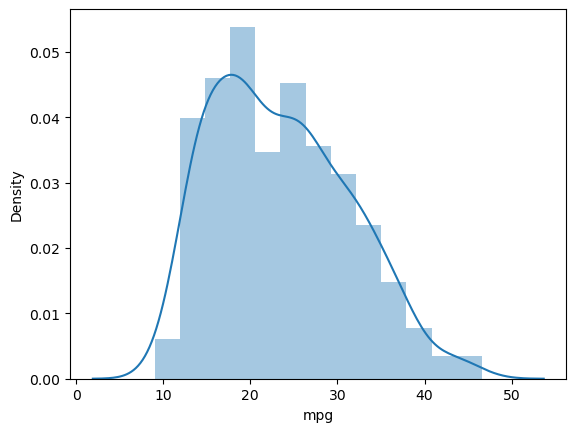

In [44]:
sns_plot = sns.distplot(df["mpg"])

### 12. Bivariate Analysis: 
“Bi” +“Variate” Bi-variate, means two variables or features are analyzed together, that how they are related to each other. Generally, we use to perform to find the relationship between the dependent and independent variable. Even you can perform this with any two variables/features in the given dataset to understand how they related to each other.

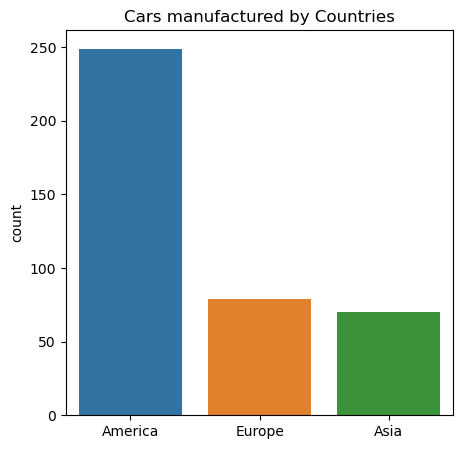

In [47]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df.origin.values, data=df)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'America'
labels[1] = 'Europe'
labels[2] = 'Asia'
ax.set_xticklabels(labels)
ax.set_title("Cars manufactured by Countries")
plt.show()

### Exploring the range and distribution of numerical Variables

C:\Users\vsren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vsren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vsren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

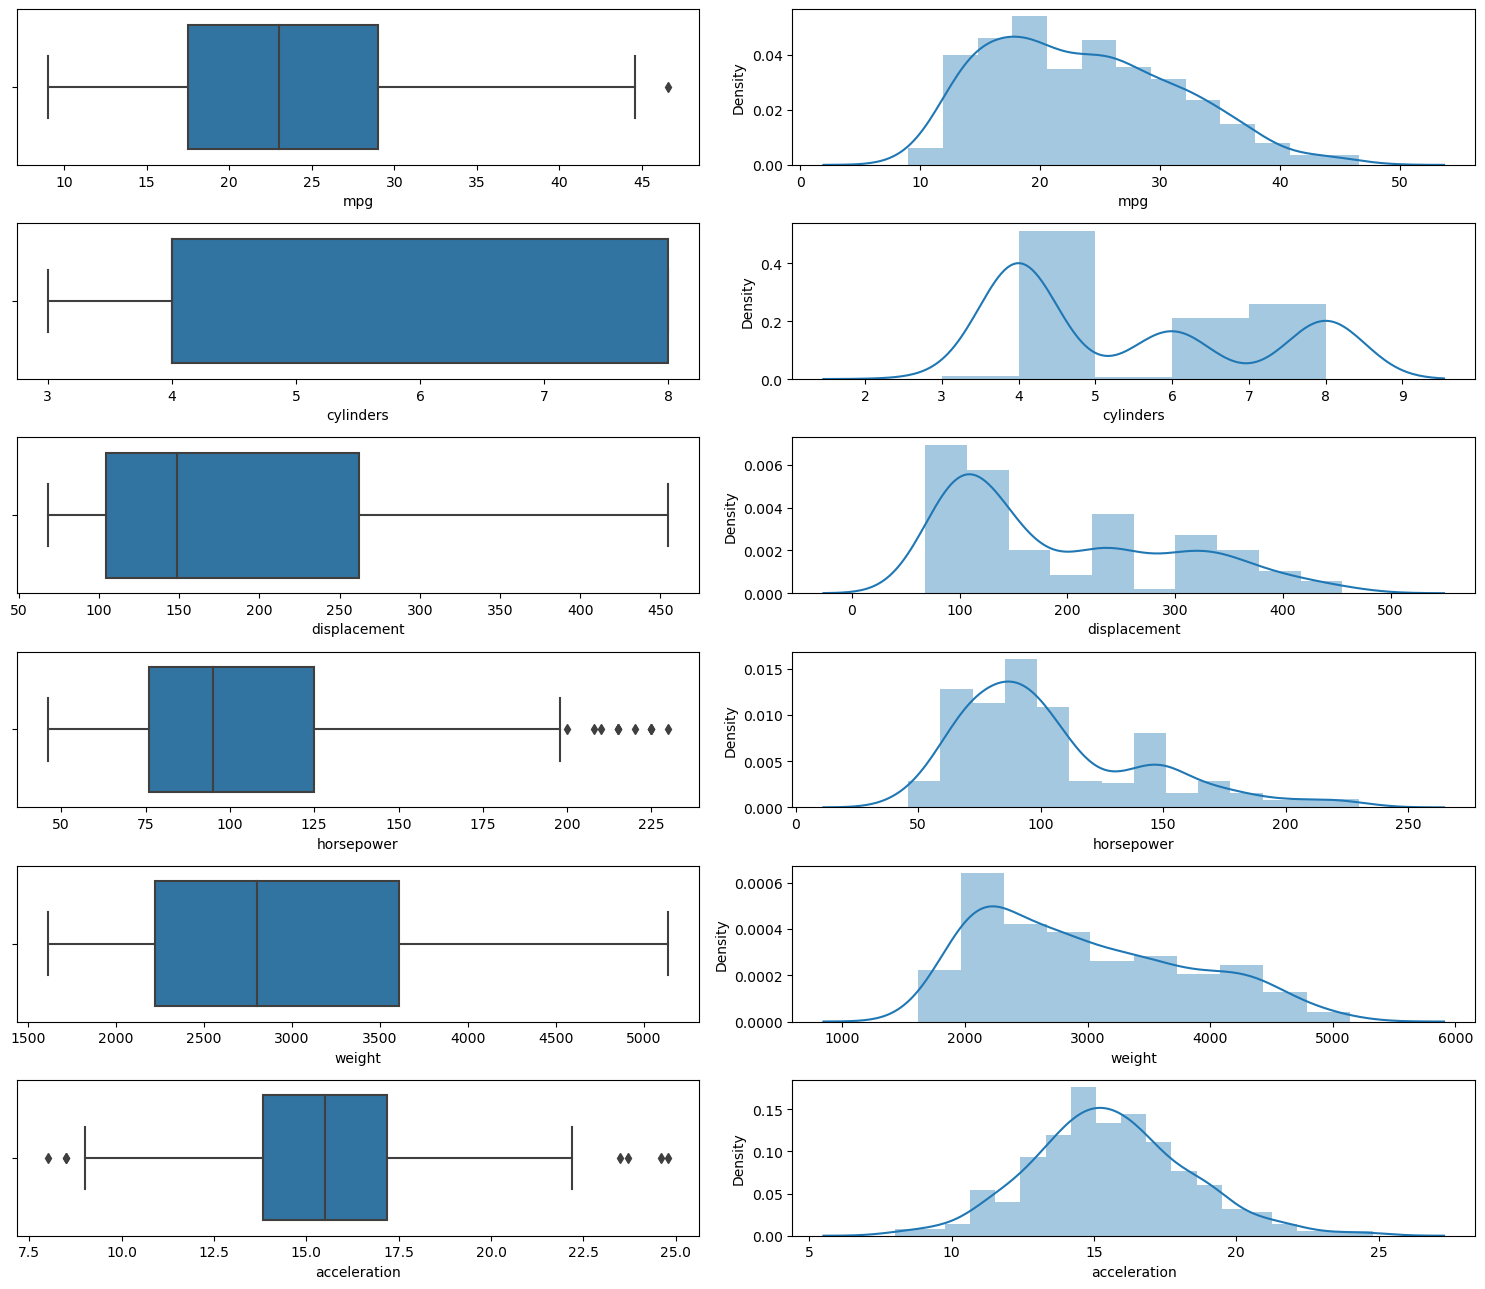

In [53]:
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= df["mpg"], ax = ax[0,0])
sns.distplot(df['mpg'], ax = ax[0,1])
sns.boxplot(x= df["cylinders"], ax = ax[1,0])
sns.distplot(df['cylinders'], ax = ax[1,1])
sns.boxplot(x= df["displacement"], ax = ax[2,0])
sns.distplot(df['displacement'], ax = ax[2,1])
sns.boxplot(x= df["horsepower"], ax = ax[3,0])
sns.distplot(df['horsepower'], ax = ax[3,1])
sns.boxplot(x= df["weight"], ax = ax[4,0])
sns.distplot(df['weight'], ax = ax[4,1])
sns.boxplot(x= df["acceleration"], ax = ax[5,0])
sns.distplot(df['acceleration'], ax = ax[5,1])
plt.tight_layout()

#### Observation: 

So let’s find out more information from these 7 charts

Well nobody manufactures 7 cylinders. Why…Does anyone know?

4 cylinder has better mileage performance than other and most manufactured ones.

8 cylinder engines have a low mileage count… of course, they focus more on pickup( fast cars).

5 cylinders, performance-wise, compete none neither 4 cylinders nor 6 cylinders.

Displacement, weight, horsepower are inversely related to mileage.
More horsepower means low mileage.

Year on Year Manufacturers has focussed on increasing the mileage of the engines.

Cars manufactured in Japan majorly focus more on mileage.

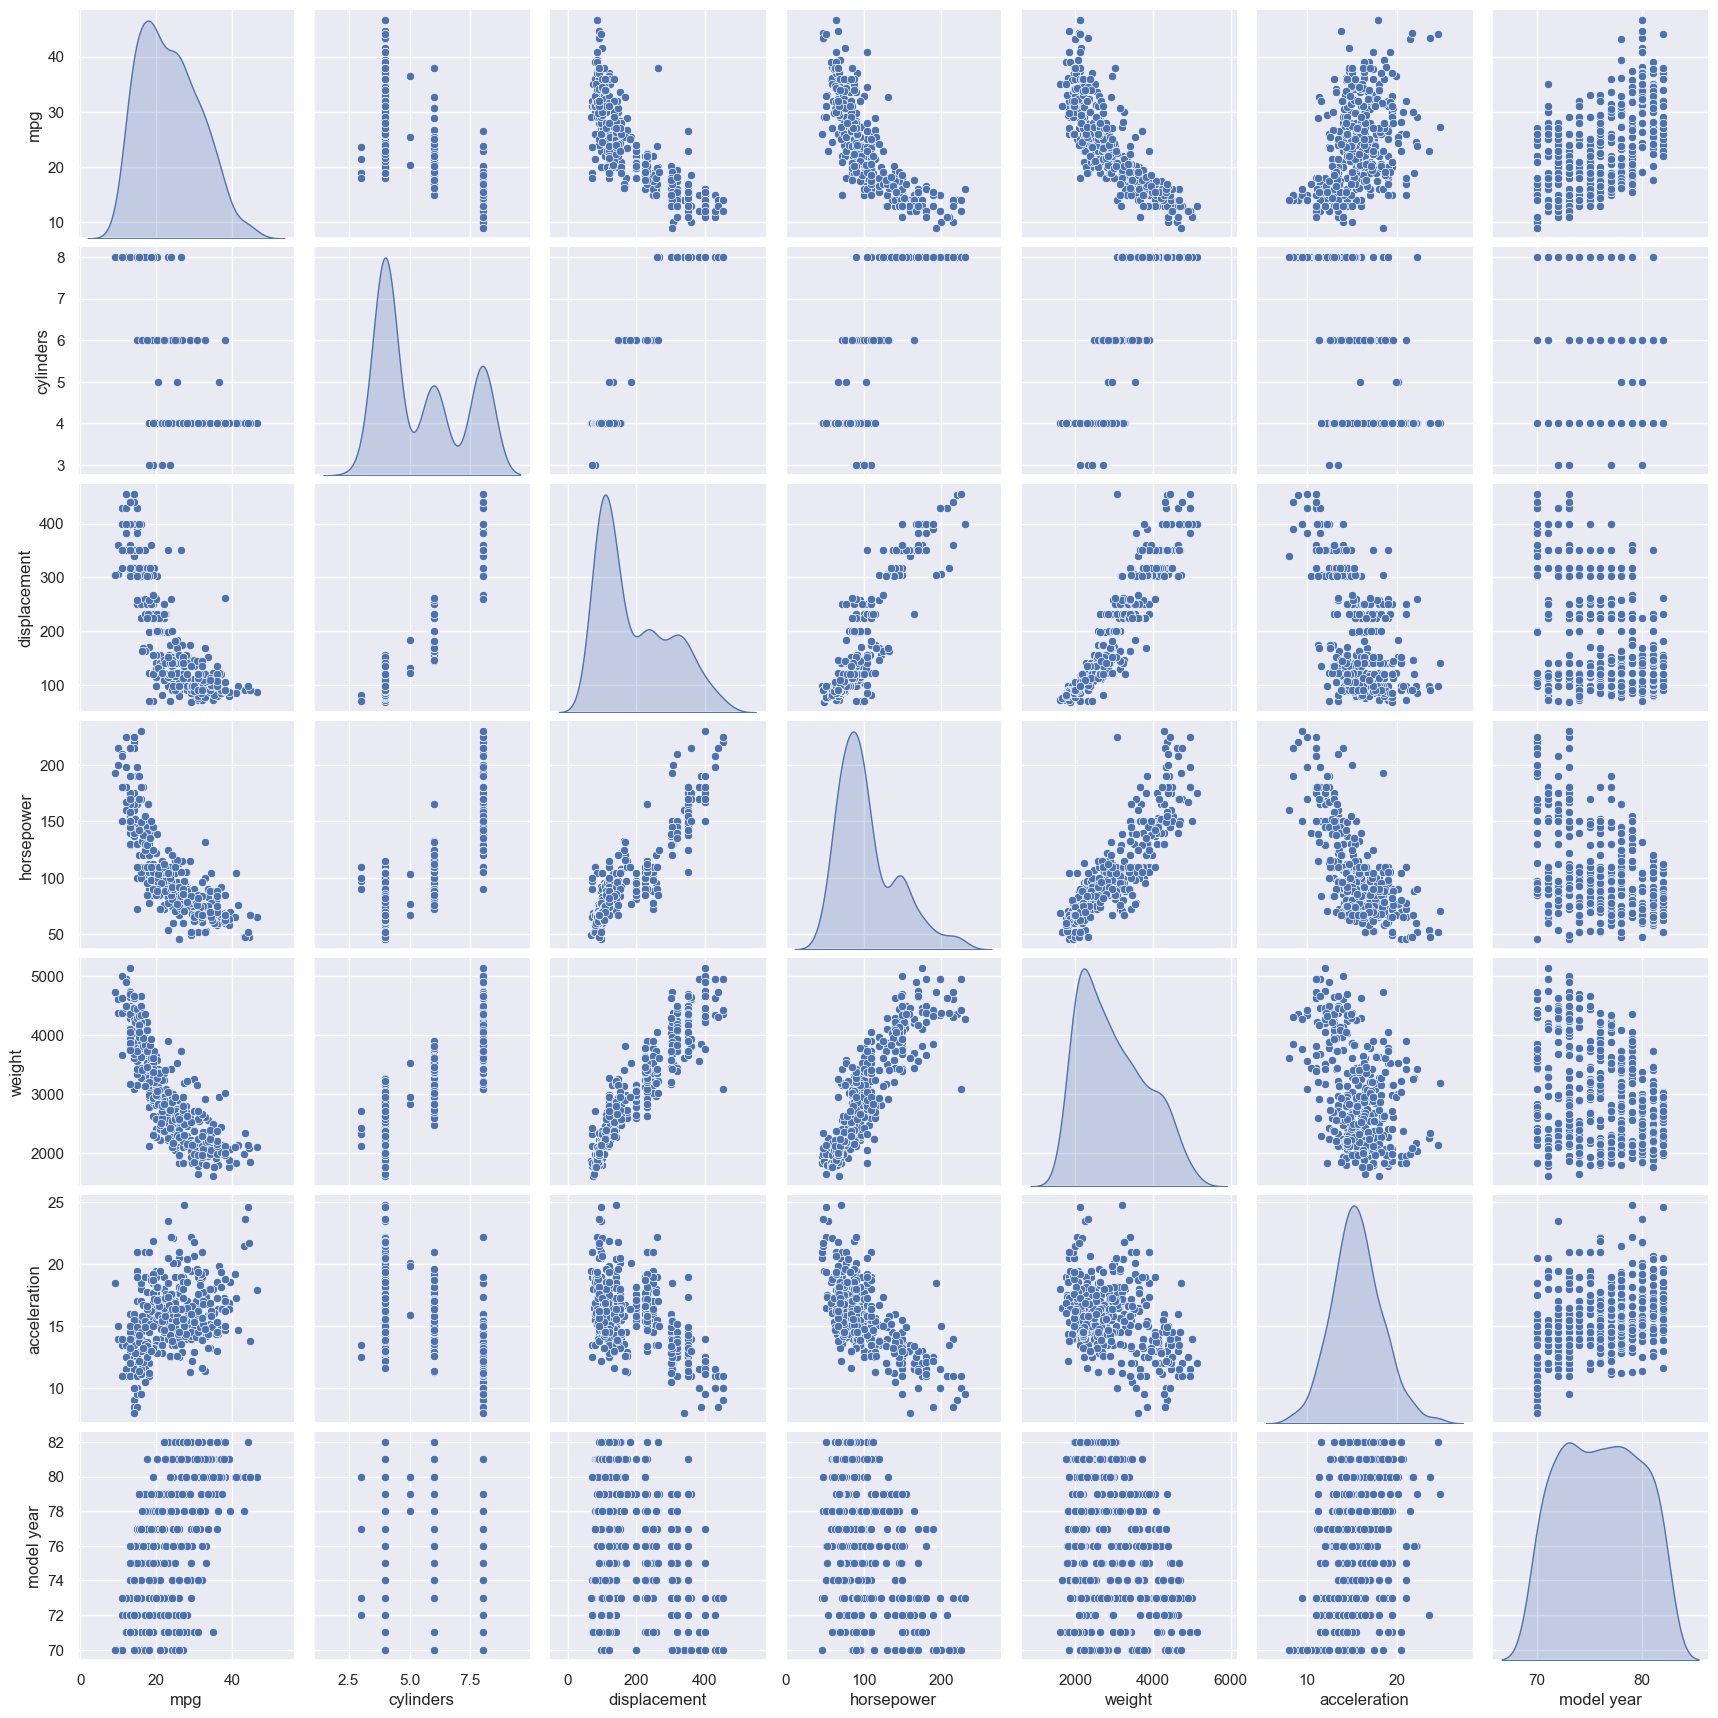

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   
# to plot density curve instead of the histogram on the diagram # Kernel density estimation(kde)

### Observation 

Between ‘mpg’ and other attributes indicates the relationship is not really linear. 

However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. 

<!-- Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity -->

### 14.Distributions of the variables/features.

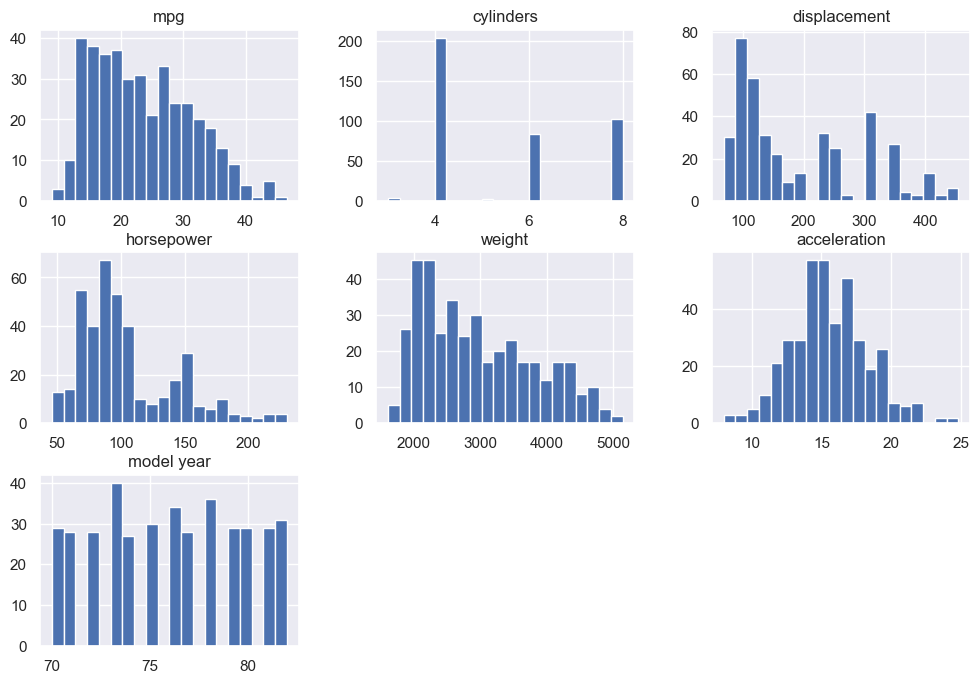

In [57]:
df.hist(figsize=(12,8),bins=20)
plt.show()

### Observation
The acceleration of the cars in the data is normally distributed and most of the cars have an acceleration of 15 meters per second squared.

Half of the total number of cars (51.3%) in the data has 4 cylinders.

Our output/dependent variable (mpg) is slightly skewed to the right.
Let’s visualize the distribution of the features of the cars

### 15.Correlation – By Heatmap the relationship between the features.

How to read? very simple

Dark color represents a positive correlation,
Light color/ white is a towards the negative correlation.

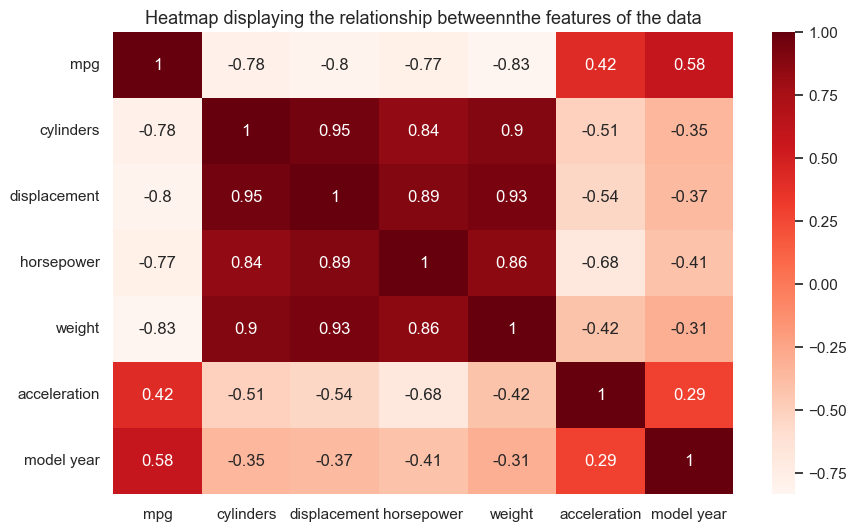

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cars.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

### Relationship between the Miles Per Gallon (mpg) and the other features.

We can see that there is a relationship between the mpg variable and the other variables and this satisfies the first assumption of Linear regression.

Strong Negative correlation between displacement, horsepower, weight, and cylinders.

This implies that, as any one of those variables increases, the mpg decreases.

Strong Positive correlations between the displacement, horsepower, weight, and cylinders.

This violates the non-multicollinearity assumption of Linear regression.

Multicollinearity hinders the performance and accuracy of our regression model. To avoid this, we have to get rid of some of these variables by doing feature selection.

The other variables.ie.acceleration, model, and origin are NOT highly correlated with each other.

So, I trust that you were able to understand the EDA in full flow here, still, there are many more functions in it, if you’re doing the EDA process clearly and precisely, there is 99% of grantee that you could build your model selection, hyperparameter tuning, and deployment process effectively without further cleaning, cleansing on your data set. You have to continuously monitor the data and model output is sustainable to predict or classify or cluster.